In [1]:
import scipy.io
import pandas as pd
import numpy as np
import random
import matplotlib.pylab as plt

In [22]:
mat = scipy.io.loadmat('../data/NYU_data_raw/data.mat')

infants = []

col_days = [i for i in range(365)]

for i in range(700):
    # I want to focus on sleep predictions for infants which aren't more than a couple of
    # weeks older than a year. I pick the data which starts
    df = pd.DataFrame(np.array(mat['data'][:,:,i]).T).dropna(axis = 1).iloc[:,:365]
    
    # I pick only infants for which there are at least 365 days of data 
    # and at no more than 20 days on the first year are missing
    if df.shape[1] == 365 and df.columns[-1] <= 385:
        df_year = df.round()
        df_year.columns = col_days
        infants.append(df_year)

In [4]:
ninf = len(infants)
print(ninf)

132


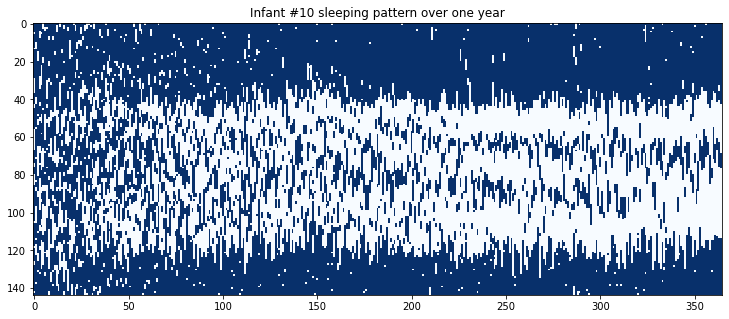

In [5]:
plt.subplots(figsize = (16, 5))
ind = 10#random.randrange(0,len(infants))
plt.title('Infant #%s sleeping pattern over one year' %ind)
plt.imshow(infants[ind], interpolation = 'none', cmap = 'Blues')

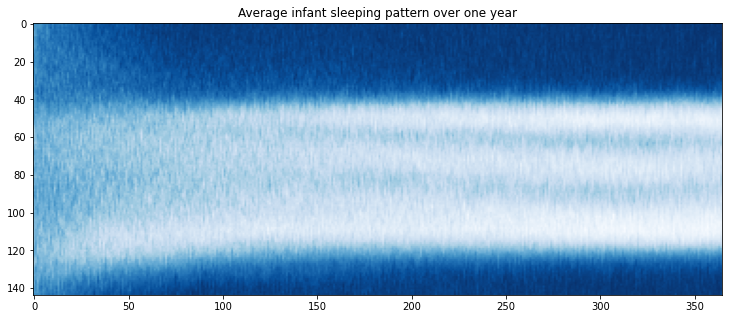

In [6]:
plt.subplots(figsize = (16, 5))
trend = sum(infants)/ninf
plt.title('Average infant sleeping pattern over one year')
plt.imshow(trend, cmap = 'Blues')

In [7]:
sleeps = pd.DataFrame()

j=0
for infant in infants:
    sleep_bin = []
    for col in infant.columns:
        for i in range(24*6):
            sleep_bin.append(int(infant[col][i]))
    sleeps[j] = sleep_bin
    j += 1

sleep_bin = []
for col in trend.columns:
    for i in range(24*6):
        sleep_bin.append(trend[col][i])
        
sleeps['trend'] = sleep_bin

/var/folders/3q/y6j41svd0q51801hbknsv5q00000gn/T/ipykernel_21171/563286667.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sleeps[j] = sleep_bin
/var/folders/3q/y6j41svd0q51801hbknsv5q00000gn/T/ipykernel_21171/563286667.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sleeps[j] = sleep_bin
/var/folders/3q/y6j41svd0q51801hbknsv5q00000gn/T/ipykernel_21171/563286667.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider

In [8]:
#Add time of day features
time_of_day = []
time_of_day_cos = []
ampm = []

for col in infants[0].columns:
    for i in range(24*6):
        time_of_day.append(i/6)
        time_of_day_cos.append(np.cos(2*np.pi*i/(6*24)))
        
        if i * 0.25 > 12:
            ampm.append(1)
        else:
            ampm.append(0)

sleeps['time'] = time_of_day
sleeps['time_cos'] = time_of_day_cos
sleeps['ampm'] = ampm

/var/folders/3q/y6j41svd0q51801hbknsv5q00000gn/T/ipykernel_21171/1534190411.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sleeps['time'] = time_of_day
/var/folders/3q/y6j41svd0q51801hbknsv5q00000gn/T/ipykernel_21171/1534190411.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sleeps['time_cos'] = time_of_day_cos
/var/folders/3q/y6j41svd0q51801hbknsv5q00000gn/T/ipykernel_21171/1534190411.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

In [25]:
timestamps = pd.date_range(start = '1/1/2000', end = '31/12/2000', freq = '10min')[:-1]
sleeps['timestamps'] = timestamps

/Users/olegdubinkin/Documents/Python/PyCharm/BabySleep/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: UserWarning: Parsing '31/12/2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [26]:
sleeps.head()

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,trend,time,time_cos,ampm,timestamps
0,0,1,0,1,1,1,1,1,1,1,...,1,0,0,0,1,0.643939,0.000000,1.000000,0,2000-01-01 00:00:00
1,0,1,0,1,0,1,1,1,1,1,...,1,0,0,0,1,0.628788,0.166667,0.999048,0,2000-01-01 00:10:00
2,0,1,0,0,0,1,0,1,1,1,...,1,1,0,0,1,0.606061,0.333333,0.996195,0,2000-01-01 00:20:00
3,0,1,0,0,0,1,0,1,1,0,...,1,1,0,0,1,0.606061,0.500000,0.991445,0,2000-01-01 00:30:00
4,0,1,0,1,0,0,0,1,1,0,...,1,1,0,0,1,0.545455,0.666667,0.984808,0,2000-01-01 00:40:00


In [27]:
sleeps[['trend', 'time', 'time_cos', 'ampm', 'timestamps']]

,trend,time,time_cos,ampm,timestamps
0,0.643939,0.000000,1.000000,0,2000-01-01 00:00:00
1,0.628788,0.166667,0.999048,0,2000-01-01 00:10:00
2,0.606061,0.333333,0.996195,0,2000-01-01 00:20:00
3,0.606061,0.500000,0.991445,0,2000-01-01 00:30:00
4,0.545455,0.666667,0.984808,0,2000-01-01 00:40:00
...,...,...,...,...,...
52555,0.946970,23.166667,0.976296,1,2000-12-30 23:10:00
52556,0.969697,23.333333,0.984808,1,2000-12-30 23:20:00
52557,0.962121,23.500000,0.991445,1,2000-12-30 23:30:00
52558,0.931818,23.666667,0.996195,1,2000-12-30 23:40:00


In [28]:
sleeps.to_csv('../data/NYU_data_processed/NYU_sleep_df.csv')
sleeps[['trend', 'time', 'time_cos', 'ampm', 'timestamps']].to_csv('../data/NYU_data_processed/NYU_trend.csv')